In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [2]:
parks_data = pd.read_csv('Data/parks_data.csv', low_memory=False)
endangered = pd.read_csv('Data/endangered.csv', low_memory=False)

In [3]:
parks_data.head()

Unnamed: 0             Park Name Location   Date Established      Area  \
0           0  Acadia National Park    Maine  February 26, 1919  49076.63   
1           1  Acadia National Park    Maine  February 26, 1919  49076.63   
2           2  Acadia National Park    Maine  February 26, 1919  49076.63   
3           3  Acadia National Park    Maine  February 26, 1919  49076.63   
4           4  Acadia National Park    Maine  February 26, 1919  49076.63   

  Visitors (2019) Park Code Category  Category Sort         Order  ...  \
0         3437286      ACAD   Mammal              1  Artiodactyla  ...   
1         3437286      ACAD   Mammal              1  Artiodactyla  ...   
2         3437286      ACAD   Mammal              1     Carnivora  ...   
3         3437286      ACAD   Mammal              1     Carnivora  ...   
4         3437286      ACAD   Mammal              1     Carnivora  ...   

  Record Status   Occurrence  Nativeness Abundance  NPS Tags Observations  \
0      Approved      Present      Native      Rare  Resident          1.0   
1      Approved      Present      Native  Abundant       NaN          NaN   
2      Approved      Present  Non-native    Common       NaN          1.0   
3      Approved  Unconfirmed      Native       NaN       NaN          NaN   
4      Approved      Present     Unknown    Common   Breeder          NaN   

   T&E State Status GRank   SRank  
0  NaN          NaN   NaN     NaN  
1  NaN          NaN    G5  ME: S5  
2   SC          NaN    G5  ME: S5  
3    E          NaN    G5  ME: SH  
4  NaN          NaN    G5  ME: S5  

[5 rows x 28 columns]

In [4]:
endangered.shape

(9544, 28)

In [5]:
parks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93347 entries, 0 to 93346
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           93347 non-null  int64  
 1   Park Name            93347 non-null  object 
 2   Location             93347 non-null  object 
 3   Date Established     93347 non-null  object 
 4   Area                 93347 non-null  float64
 5   Visitors (2019)      93347 non-null  object 
 6   Park Code            93347 non-null  object 
 7   Category             93347 non-null  object 
 8   Category Sort        93347 non-null  int64  
 9   Order                92802 non-null  object 
 10  Family               92806 non-null  object 
 11  Taxon Code           93347 non-null  int64  
 12  TSN                  92904 non-null  float64
 13  Taxon Record Status  93347 non-null  object 
 14  Scientific Name      93347 non-null  object 
 15  Common Names         87302 non-null 

In [6]:
parks_data.columns

Index(['Unnamed: 0', 'Park Name', 'Location', 'Date Established', 'Area',
       'Visitors (2019)', 'Park Code', 'Category', 'Category Sort', 'Order',
       'Family', 'Taxon Code', 'TSN', 'Taxon Record Status', 'Scientific Name',
       'Common Names', 'Park Accepted', 'Sens?', 'Record Status', 'Occurrence',
       'Nativeness', 'Abundance', 'NPS Tags', 'Observations', 'T&E',
       'State Status', 'GRank', 'SRank'],
      dtype='object')

In [7]:
features = ['Park Name', 'Date Established', 'Area', 'Visitors (2019)', 'Category', 'Park Name']
X = parks_data[features]
y = parks_data.Location

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state =246)

In [9]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [10]:
entr_model = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=246)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred) 
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=246)

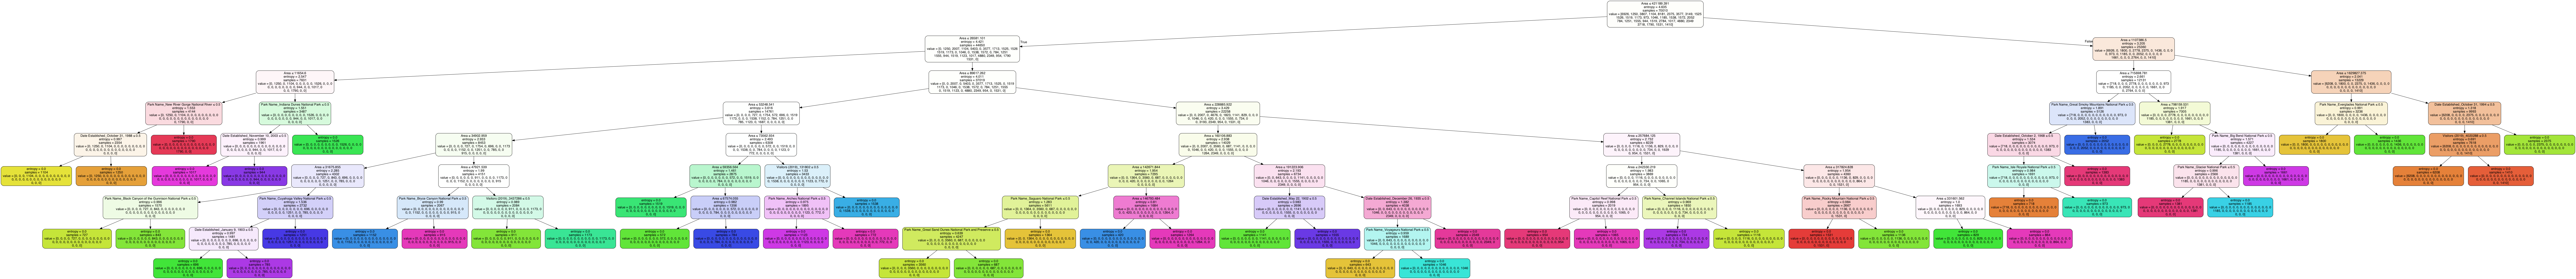

In [11]:
dot_data = StringIO()
tree.export_graphviz(entr_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [12]:
gini_model = tree.DecisionTreeClassifier(criterion = 'gini', random_state=246)
gini_model.fit(X_train, y_train)
gini_model.predict(X_test) 
y_pred = pd.Series(y_pred) 
gini_model

DecisionTreeClassifier(random_state=246)

In [13]:
dot_data = StringIO()

tree.export_graphviz(gini_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
print(gini_model.classes_)

['Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'California, Nevada' 'Colorado' 'Florida' 'Hawaii' 'Indiana' 'Kentucky'
 'Maine' 'Michigan' 'Minnesota' 'Montana' 'Nevada' 'New Mexico'
 'North Carolina, Tennessee' 'North Dakota' 'Ohio' 'Oregon'
 'South Carolina' 'South Dakota' 'Texas' 'U.S. Virgin Islands' 'Utah'
 'Virginia' 'Washington' 'West Virginia' 'Wyoming'
 'Wyoming, Montana, Idaho']


In [15]:
print("Model Gini impurity model - No Max Depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

Model Gini impurity model - No Max Depth
Accuracy: 1.0
Balanced accuracy: 1.0


In [16]:
gini_model2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=246)
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred) 
gini_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=246)

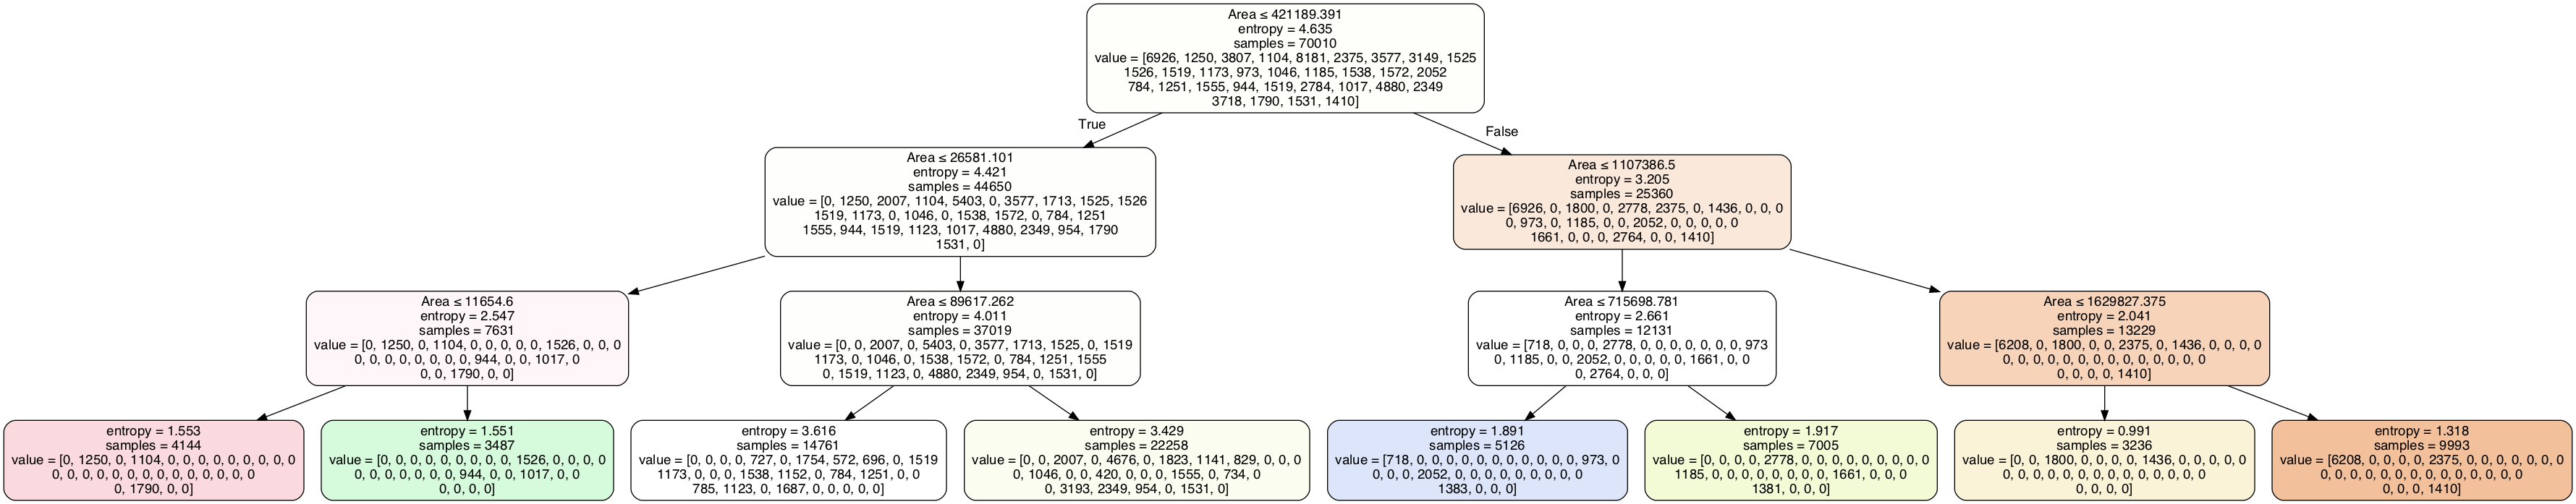

In [17]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
gini_model2.classes_

array(['Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California',
       'California, Nevada', 'Colorado', 'Florida', 'Hawaii', 'Indiana',
       'Kentucky', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Nevada',
       'New Mexico', 'North Carolina, Tennessee', 'North Dakota', 'Ohio',
       'Oregon', 'South Carolina', 'South Dakota', 'Texas',
       'U.S. Virgin Islands', 'Utah', 'Virginia', 'Washington',
       'West Virginia', 'Wyoming', 'Wyoming, Montana, Idaho'],
      dtype=object)

In [19]:
print("Model Gini Impurity model - Max Depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

Model Gini Impurity model - Max Depth 3
Accuracy: 0.3235634400308523
Balanced accuracy: 0.1865811931783854


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [21]:
firstRFModel = RandomForestClassifier(max_depth= 3, random_state= 246)
firstRFModel.fit(X_train, y_train)
y_pred = firstRFModel.predict(X_test)

In [22]:
print("Model Random Forest model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

Model Random Forest model
Accuracy: 0.4135921498050306
Balanced accuracy: 0.261470444279451
